# Michael Liao's Assessment

This report documented my process of solving the assessment, including the data exploration, feature engineering, model selection, and evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data and EDA

In [2]:
train_x = np.load('./data/train_data.npy')
train_y = np.load('./data/train_labels.npy')
eval_x = np.load('./data/eval_data.npy')
eval_y = np.load('./data/eval_labels.npy')

#### Turn into pd DataFrame

In [ ]:
train_x = pd.DataFrame(train_x)
eval_x = pd.DataFrame(eval_x)

In [4]:
train_x

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,...,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,...,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556
2,0.760572,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.433292,0.068885,0.908483,1.140838,...,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556
3,1.114048,-0.029401,0.142649,-0.172883,0.117582,-0.152395,0.060256,0.198770,0.098029,0.820122,...,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556
4,0.448862,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.321162,0.342947,1.146333,1.163741,...,0.0,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174456,-0.129721,-0.786425,-0.241619,0.069267,-0.175944,0.029027,0.754470,-0.211944,0.696303,-1.608424,...,1.0,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489
1174457,1.884997,0.018018,-0.241619,0.069267,1.691313,-1.663993,0.754470,0.379784,1.729425,-0.464348,...,1.0,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489
1174458,0.328971,-0.786425,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-0.681625,0.329797,1.898219,...,1.0,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489
1174459,0.328971,1.541642,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-1.484551,-0.186764,1.211692,...,1.0,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489


In [5]:
pd.DataFrame(train_y).value_counts()

0
0    637044
2    280471
1    256946
Name: count, dtype: int64

In [6]:
pd.DataFrame(eval_y).value_counts()

0
0    635393
2    290870
1    249039
Name: count, dtype: int64

In [99]:
eval_x.shape[0]

1175302

In [100]:
len(eval_y)

1175302

We can see that there are three labels in both train and eval data, with both similar number of samples.

In [7]:
df_train = train_x.copy()
df_train['label'] = train_y
df_eval = eval_x.copy()
df_eval['label'] = eval_y

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1
2,0.760572,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.433292,0.068885,0.908483,1.140838,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
3,1.114048,-0.029401,0.142649,-0.172883,0.117582,-0.152395,0.060256,0.198770,0.098029,0.820122,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
4,0.448862,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.321162,0.342947,1.146333,1.163741,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174456,-0.129721,-0.786425,-0.241619,0.069267,-0.175944,0.029027,0.754470,-0.211944,0.696303,-1.608424,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174457,1.884997,0.018018,-0.241619,0.069267,1.691313,-1.663993,0.754470,0.379784,1.729425,-0.464348,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174458,0.328971,-0.786425,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-0.681625,0.329797,1.898219,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174459,0.328971,1.541642,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-1.484551,-0.186764,1.211692,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1


Check for missing values

In [ ]:
print(df_train.isna().sum().to_markdown())

|       |   0 |
|:------|----:|
| 0     |   0 |
| 1     |   0 |
| 2     |   0 |
| 3     |   0 |
| 4     |   0 |
| 5     |   0 |
| 6     |   0 |
| 7     |   0 |
| 8     |   0 |
| 9     |   0 |
| 10    |   0 |
| 11    |   0 |
| 12    |   0 |
| 13    |   0 |
| 14    |   0 |
| 15    |   0 |
| 16    |   0 |
| 17    |   0 |
| 18    |   0 |
| 19    |   0 |
| 20    |   0 |
| 21    |   0 |
| 22    |   0 |
| 23    |   0 |
| 24    |   0 |
| 25    |   0 |
| 26    |   0 |
| 27    |   0 |
| 28    |   0 |
| 29    |   0 |
| 30    |   0 |
| 31    |   0 |
| 32    |   0 |
| 33    |   0 |
| 34    |   0 |
| 35    |   0 |
| 36    |   0 |
| 37    |   0 |
| 38    |   0 |
| 39    |   0 |
| 40    |   0 |
| 41    |   0 |
| 42    |   0 |
| 43    |   0 |
| 44    |   0 |
| 45    |   0 |
| 46    |   0 |
| 47    |   0 |
| 48    |   0 |
| 49    |   0 |
| 50    |   0 |
| 51    |   0 |
| 52    |   0 |
| 53    |   0 |
| 54    |   0 |
| 55    |   0 |
| 56    |   0 |
| 57    |   0 |
| 58    |   0 |
| 59    |   0 |
| 60    

In [ ]:
print(df_eval.isna().sum().to_markdown())

|       |   0 |
|:------|----:|
| 0     |   0 |
| 1     |   0 |
| 2     |   0 |
| 3     |   0 |
| 4     |   0 |
| 5     |   0 |
| 6     |   0 |
| 7     |   0 |
| 8     |   0 |
| 9     |   0 |
| 10    |   0 |
| 11    |   0 |
| 12    |   0 |
| 13    |   0 |
| 14    |   0 |
| 15    |   0 |
| 16    |   0 |
| 17    |   0 |
| 18    |   0 |
| 19    |   0 |
| 20    |   0 |
| 21    |   0 |
| 22    |   0 |
| 23    |   0 |
| 24    |   0 |
| 25    |   0 |
| 26    |   0 |
| 27    |   0 |
| 28    |   0 |
| 29    |   0 |
| 30    |   0 |
| 31    |   0 |
| 32    |   0 |
| 33    |   0 |
| 34    |   0 |
| 35    |   0 |
| 36    |   0 |
| 37    |   0 |
| 38    |   0 |
| 39    |   0 |
| 40    |   0 |
| 41    |   0 |
| 42    |   0 |
| 43    |   0 |
| 44    |   0 |
| 45    |   0 |
| 46    |   0 |
| 47    |   0 |
| 48    |   0 |
| 49    |   0 |
| 50    |   0 |
| 51    |   0 |
| 52    |   0 |
| 53    |   0 |
| 54    |   0 |
| 55    |   0 |
| 56    |   0 |
| 57    |   0 |
| 58    |   0 |
| 59    |   0 |
| 60    

There are no missing values in the dataset.

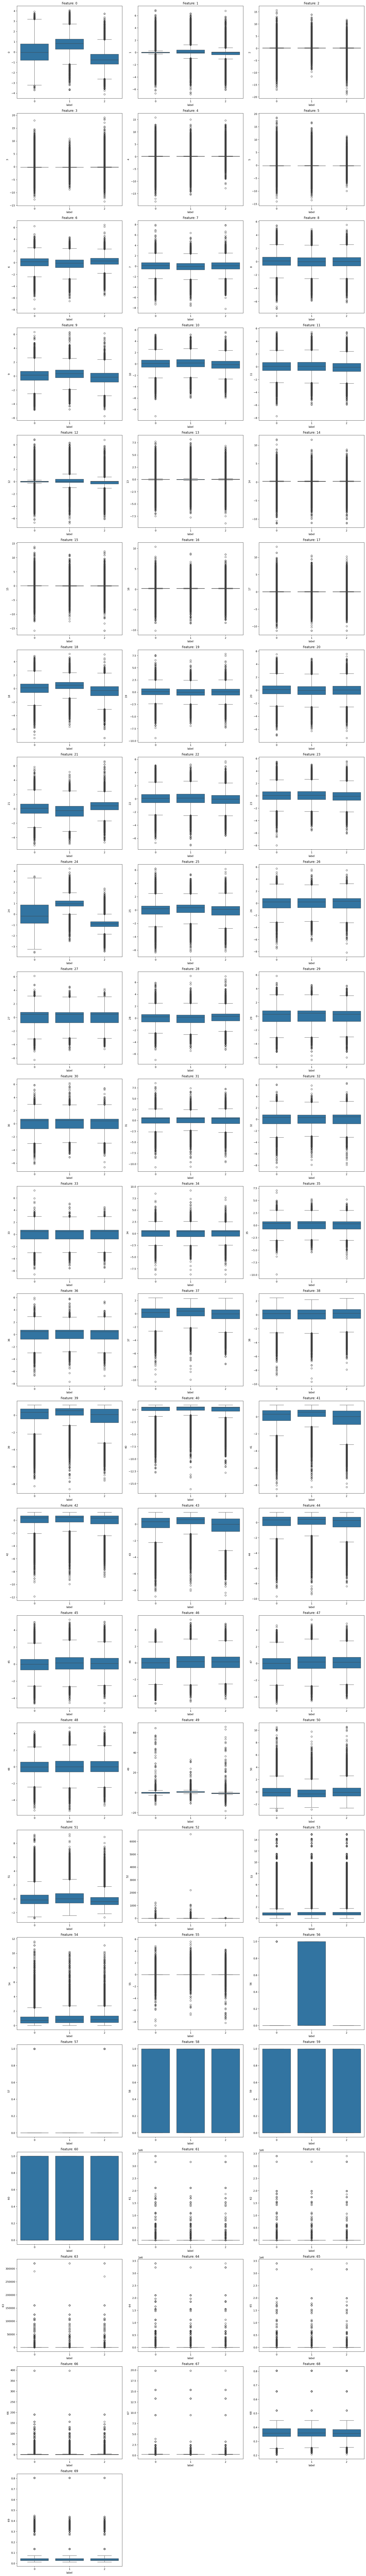

In [ ]:
# Number of features
num_features = train_x.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=num_features // 3 + 1, ncols=3, figsize=(20, num_features * 2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(train_x.columns):
    sns.boxplot(x='label', y=col, data=train_x, ax=axes[i])
    axes[i].set_title(f'Feature: {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From looking at the boxplot, we can eyeball some features that have more obvious differences between the three classes: 0, 1, 3, 6, 9, 12, 18, 21, 24, 49. Other features have similar statistics between the three classes.

In [29]:
correlation_matrix = train_x.corr(method='pearson')

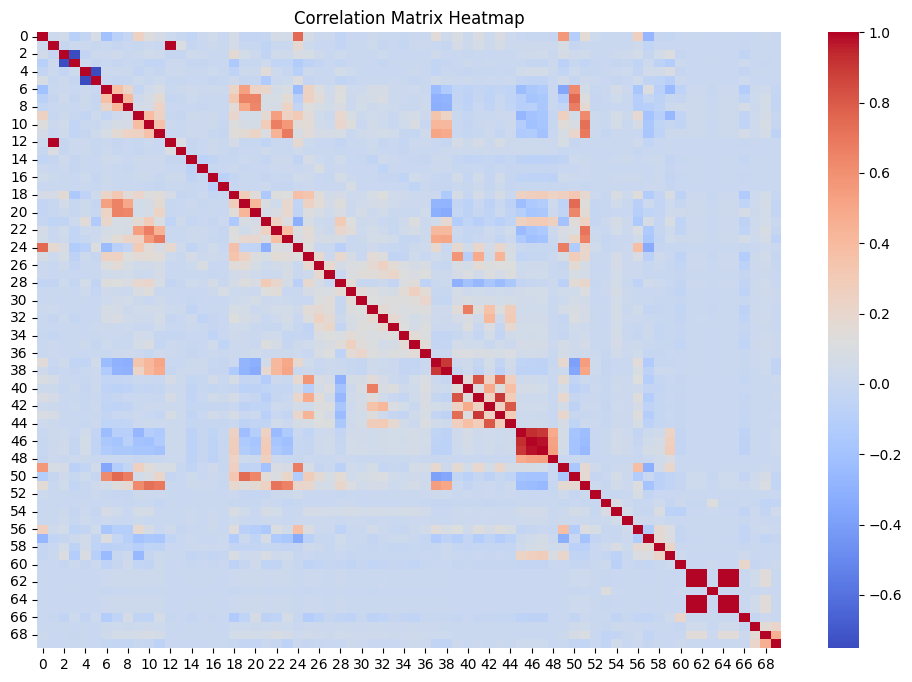

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()

From the correlation matrix, we see feature 1 and 12, 37 and 38 are highly postively correlated with each other. 39 to 44 features, 61 to 65 features are also highly correlated with each other.

## PCA

We try to perform PCA to reduce the dimensionality of the dataset and see if we can get a better separation between the three classes.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
# Standardize the data
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
eval_x_scaled = scaler.transform(eval_x)

# Apply PCA
pca = PCA(n_components=10)  # 10 PCA components
train_x_pca = pca.fit_transform(train_x_scaled)
eval_x_pca = pca.transform(eval_x_scaled)

print(f"Original shape: {train_x.shape}")
print(f"Transformed shape: {train_x_pca.shape}")

Original shape: (1174461, 70)
Transformed shape: (1174461, 10)


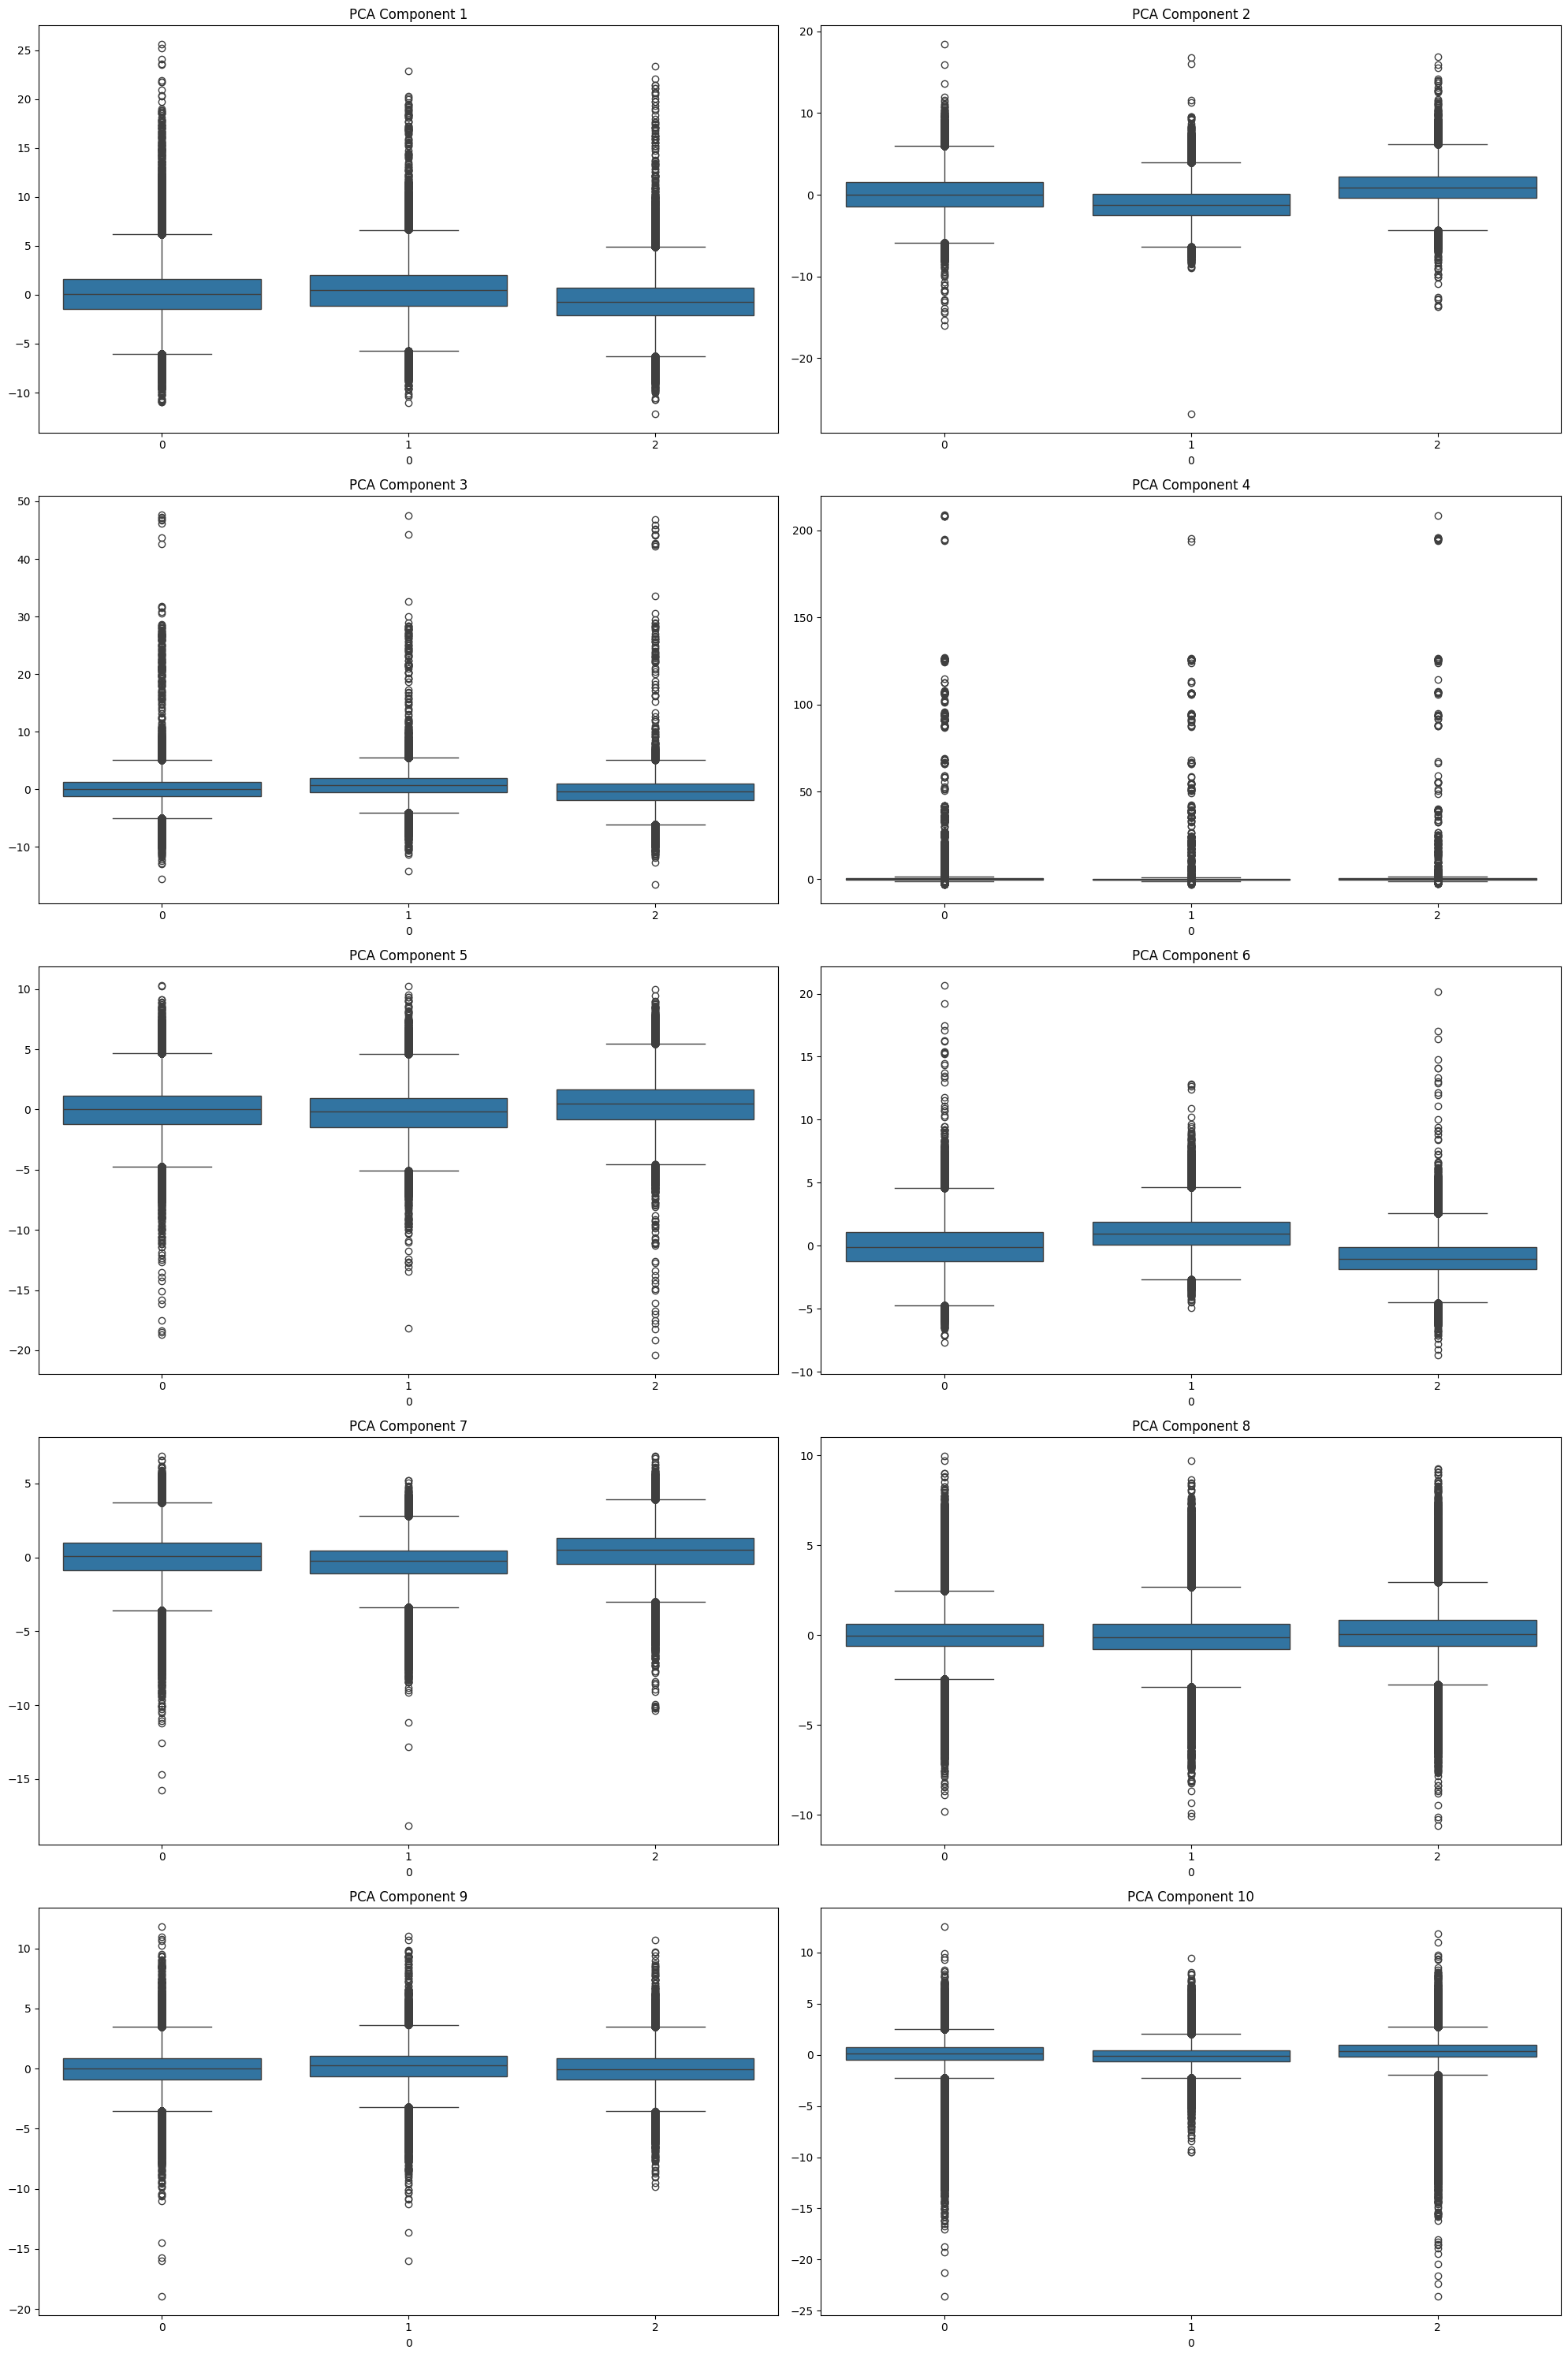

In [37]:
num_features = train_x_pca.shape[1]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

axes = axes.flatten()

for i in range(num_features):
    sns.boxplot(x=train_y[0], y=train_x_pca[:, i], ax=axes[i])
    axes[i].set_title(f'PCA Component {i + 1}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We do not see a clear separation between the three classes in each of the 10 PCA components.

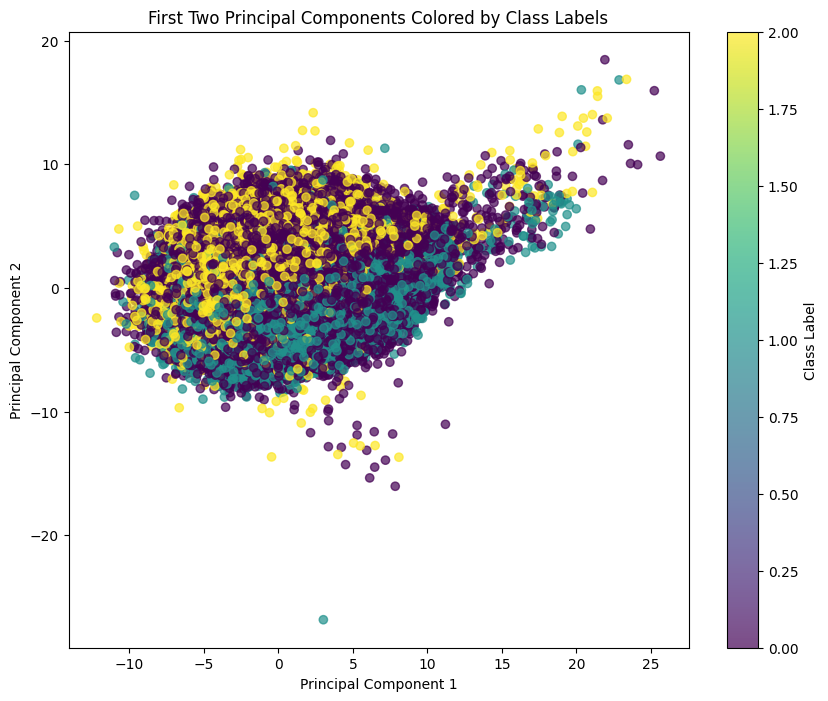

In [180]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_pca[:, 0], train_x_pca[:, 1], c=train_y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Class Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components Colored by Class Labels')
plt.show()

We also are not able to see a clear separation between the three classes in the scatter plot of the first two PCA components.

We tried to turn to t-SNE to see if we can get a better separation between the three classes. However, due to the size of the dataset, we are not able to run t-SNE on the entire dataset. Instead, we first sample 1% of the dataset, and then try to run more demanding preprocessing steps such as t-SNE.

### Sample 1% of the data for sample training, 0.25% for sample testing

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)
# Get 1% for sample training
for large_port_index, small_port_index in split.split(train_x, train_y):
    train_sample = train_x.loc[small_port_index]
    train_sample_labels = train_y[small_port_index]
train_sample = train_sample.reset_index(drop=True)

# Get 0.25% for test
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.0025, random_state=42)
for _, small_in_big_idx in split2.split(train_x.loc[large_port_index], train_y[large_port_index]):
    test_sample = train_x.loc[small_in_big_idx]
    test_sample_labels = train_y[small_in_big_idx]
test_sample = test_sample.reset_index(drop=True)

The logic here is to sample 1% of the data in a stratified manner to ensure that the distribution of the classes is similar to the original dataset. We then sample 0.25% of the rest of the data for testing.

In [7]:
train_sample.shape

(11745, 70)

In [8]:
test_sample.shape

(2907, 70)

### Sample the equal number of samples from each class

Later in this project, we tried to improve the model performance by providing it with a balanced dataset. Therefore, here we sample the equal number of samples from each class.

In [9]:
pd.DataFrame(train_y).value_counts()
# 0 is 2.25 times label 2
# 0 is 2.5 times label 1

0
0    637044
2    280471
1    256946
Name: count, dtype: int64

In [10]:
train_0_x = train_x[train_y == 0].reset_index(drop=True)
train_1_x = train_x[train_y == 1].reset_index(drop=True)
train_2_x = train_x[train_y == 2].reset_index(drop=True)

train_0_y = train_y[train_y == 0]
train_1_y = train_y[train_y == 1]
train_2_y = train_y[train_y == 2]

In [14]:
prct = 0.01
split = StratifiedShuffleSplit(n_splits=1, test_size=prct, random_state=42)
# Get 1% for sample training
for large_port_index, small_port_index in split.split(train_0_x, train_0_y):
    train_0_sample = train_0_x.loc[small_port_index]
    train_0_sample_labels = train_0_y[small_port_index]
train_0_sample = train_0_sample.reset_index(drop=True)

split2 = StratifiedShuffleSplit(n_splits=1, test_size=prct/4, random_state=42)
for _, small_in_big_idx in split2.split(train_0_x.loc[large_port_index], train_0_y[large_port_index]):
    test_0_sample = train_0_x.loc[small_in_big_idx]
    test_0_sample_labels = train_0_y[small_in_big_idx]
test_0_sample = test_0_sample.reset_index(drop=True)

In [15]:
prct_1 = prct * 2.5
split = StratifiedShuffleSplit(n_splits=1, test_size=prct_1, random_state=42)
# Get 1% for sample training
for large_port_index, small_port_index in split.split(train_1_x, train_1_y):
    train_1_sample = train_1_x.loc[small_port_index]
    train_1_sample_labels = train_1_y[small_port_index]
train_1_sample = train_1_sample.reset_index(drop=True)

split2 = StratifiedShuffleSplit(n_splits=1, test_size=prct_1/4, random_state=42)
for _, small_in_big_idx in split2.split(train_1_x.loc[large_port_index], train_1_y[large_port_index]):
    test_1_sample = train_1_x.loc[small_in_big_idx]
    test_1_sample_labels = train_1_y[small_in_big_idx]
test_1_sample = test_1_sample.reset_index(drop=True)

In [16]:
prct_2 = prct * 2.25
split = StratifiedShuffleSplit(n_splits=2, test_size=prct_2, random_state=42)
for large_port_index, small_port_index in split.split(train_2_x, train_2_y):
    train_2_sample = train_2_x.loc[small_port_index]
    train_2_sample_labels = train_2_y[small_port_index]
train_2_sample = train_2_sample.reset_index(drop=True)

split2 = StratifiedShuffleSplit(n_splits=2, test_size=prct_2/4, random_state=42)
for _, small_in_big_idx in split2.split(train_2_x.loc[large_port_index], train_2_y[large_port_index]):
    test_2_sample = train_2_x.loc[small_in_big_idx]
    test_2_sample_labels = train_2_y[small_in_big_idx]
test_2_sample = test_2_sample.reset_index(drop=True)

We do the same for each of the classes but incorporate different percentages of sampling to reach a balanced dataset.

In [14]:
print(train_0_sample.shape)
print(test_0_sample.shape)
print(train_1_sample.shape)
print(test_1_sample.shape)
print(train_2_sample.shape)
print(test_2_sample.shape)

(6371, 70)
(1577, 70)
(6424, 70)
(1566, 70)
(6311, 70)
(1543, 70)


In [17]:
train_equal_sample_x = pd.concat([train_0_sample, train_1_sample, train_2_sample], ignore_index=True)
train_equal_sample_y = np.concatenate([train_0_sample_labels, train_1_sample_labels, train_2_sample_labels])

test_equal_sample_x = pd.concat([test_0_sample, test_1_sample, test_2_sample], ignore_index=True)
test_equal_sample_y = np.concatenate([test_0_sample_labels, test_1_sample_labels, test_2_sample_labels])

In [18]:
from sklearn.utils import shuffle

In [19]:
train_equal_sample_x, train_equal_sample_y = shuffle(train_equal_sample_x, 
                                                     train_equal_sample_y, 
                                                     random_state=42)

test_equal_sample_x, test_equal_sample_y = shuffle(test_equal_sample_x,
                                                   test_equal_sample_y,
                                                   random_state=42)

We then concatenate the balanced dataset and shuffle it.

In [84]:
train_equal_sample_x

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
11632,0.554761,0.309195,0.090716,-0.133856,0.099681,-0.150819,0.849618,0.330801,-1.853684,0.116002,...,0.0,0.751880,1.503759,3.937008,2.105263,0.751880,0.485493,0.264640,0.313725,0.013105
9380,1.510681,0.002211,0.132398,-0.199995,0.059063,-0.130439,-0.170307,-0.278064,-0.733932,-2.762953,...,1.0,-3.532609,0.271739,1.089918,5.434783,-3.532609,1.516799,0.264640,0.313725,0.013105
4518,0.839632,-1.277810,0.023250,-0.135257,-0.029637,-0.123820,-2.917931,-2.668974,1.545952,-0.378621,...,1.0,0.000000,4.372624,5.809129,9.885932,0.000000,2.123161,0.278030,0.381471,0.047219
6388,1.542763,0.022188,0.119784,-0.152171,0.055099,-0.117189,-1.624973,-0.362941,-1.862781,1.405409,...,0.0,0.652174,2.173913,2.388708,3.043478,0.652174,0.443913,0.274867,0.425414,0.057592
1443,-0.954395,0.034321,0.158613,-0.188611,0.141407,-0.170258,-0.474947,-1.316211,-0.228372,-0.402255,...,0.0,0.000000,0.000000,3.170732,0.000000,-0.250000,0.027426,0.238462,0.325806,0.030303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.866059,0.022552,0.127240,-0.171283,0.106861,-0.164728,0.589353,-0.002004,0.513323,0.073008,...,0.0,-0.581395,6.782946,3.784861,7.364341,-1.550388,7.771687,0.242469,0.315152,0.034918
11964,0.809739,0.087470,0.112591,-0.186972,-4.044266,4.160782,0.661847,0.991509,0.291422,1.466068,...,1.0,0.253165,3.164557,2.831403,4.430380,0.253165,4.144171,0.286657,0.355499,0.028777
5390,0.978865,0.007780,0.105069,-0.141984,0.109253,-0.138642,0.384583,-0.008861,-0.060713,-0.369786,...,0.0,1.907357,0.817439,1.928375,1.907357,0.817439,1.625091,0.249815,0.355030,0.025616
860,0.807549,0.025435,0.171566,-0.193191,0.119006,-0.140579,-0.729702,-0.332223,0.103946,-0.191523,...,1.0,5.000000,0.000000,5.219780,5.000000,-7.500000,8.647905,0.272955,0.403670,0.025258


In [85]:
train_equal_sample_y

array([1, 1, 0, ..., 0, 0, 2], shape=(19106,))

PCA the equal-sized sample data

In [20]:
# Standardize the data
scaler = StandardScaler()
train_x_eq_scaled = scaler.fit_transform(train_equal_sample_x)
test_x_eq_scaled = scaler.transform(test_equal_sample_x)

# Apply PCA
pca = PCA(n_components=10)  # 10 PCA components
train_x_eq_pca = pca.fit_transform(train_x_eq_scaled)
test_x_eq_pca = pca.transform(test_x_eq_scaled)

We also picked the maximum possible dataset with balanced classes.

In [60]:
# Get indices
label_0_indices = np.where(train_y == 0)[0]
label_1_indices = np.where(train_y == 1)[0]
label_2_indices = np.where(train_y == 2)[0]

# Randomly sample label 0 and 2 indices to match the count of label 1 (smallest class)
np.random.seed(42)
sampled_label_0_indices = np.random.choice(label_0_indices, 
                                           size=len(label_1_indices), 
                                           replace=False)
sampled_label_2_indices = np.random.choice(label_2_indices, 
                                           size=len(label_1_indices), 
                                           replace=False)

# Combine sampled label 0 indices with label 1 indices
balanced_indices = np.concatenate([sampled_label_0_indices, 
                                   label_1_indices, 
                                   sampled_label_2_indices])

# Shuffle the combined indices
np.random.shuffle(balanced_indices)

# Create balanced train_x and train_y_binary
train_x_balanced = train_x.iloc[balanced_indices].reset_index(drop=True)
train_y_balanced = train_y[balanced_indices]

# Standardize the data
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x_balanced)

In [61]:
pd.DataFrame(train_y_balanced).value_counts()

0
0    256946
1    256946
2    256946
Name: count, dtype: int64

We also later try to turn the dataset into a binary labeled data by combining class 1 and 2 into one class. We then try to PCA the binary labeled data.

In [21]:
# Create a data of only 0 and 1 (1 includes the original 1 and 2)
train_y_binary = train_y.copy()
train_y_binary[train_y_binary == 2] = 1
eval_y_binary = eval_y.copy()
eval_y_binary[eval_y_binary == 2] = 1

In [22]:
pd.DataFrame(train_y_binary).value_counts()

0
0    637044
1    537417
Name: count, dtype: int64

Here we try to sample randomly the label 0 data for the same number of samples as the label 1 data to get a balanced and binary labeled dataset.

In [23]:
# Get indices of label 0 and label 1
label_0_indices = np.where(train_y_binary == 0)[0]
label_1_indices = np.where(train_y_binary == 1)[0]

# Randomly sample label 0 indices to match the count of label 1
np.random.seed(42)
sampled_label_0_indices = np.random.choice(label_0_indices, 
                                           size=len(label_1_indices), 
                                           replace=False)

# Combine sampled label 0 indices with label 1 indices
balanced_indices = np.concatenate([sampled_label_0_indices, label_1_indices])

# Shuffle the combined indices
np.random.shuffle(balanced_indices)

# Create balanced train_x and train_y_binary
train_x_bi_balanced = train_x.iloc[balanced_indices].reset_index(drop=True)
train_y_bi_balanced = train_y_binary[balanced_indices]

# Standardize the data
scaler = StandardScaler()
train_x_bi_scaled = scaler.fit_transform(train_x_bi_balanced)

In [24]:
pd.DataFrame(train_y_bi_balanced).value_counts()

0
0    537417
1    537417
Name: count, dtype: int64

Sample 1% of the binary data

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)
# Get 1% for sample training
for large_port_index, small_port_index in split.split(train_x_bi_scaled, 
                                                      train_y_bi_balanced):
    train_sample_bi_balanced = train_x_bi_scaled[small_port_index]
    train_sample_bi_balanced_labels = train_y_bi_balanced[small_port_index]

In [26]:
train_sample_bi_balanced.shape

(10749, 70)

In [30]:
pd.DataFrame(train_sample_bi_balanced_labels).value_counts()

0
0    5375
1    5374
Name: count, dtype: int64

### t-SNE

Finally we can use the sampled data to run t-SNE to see if we can get a better separation between the three classes.

In [31]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

# Run TSNE on the 1% of original data
# Standardize the data first
train_sample_scaled = StandardScaler().fit_transform(train_sample) 
train_x_tsne = tsne.fit_transform(train_sample_scaled)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


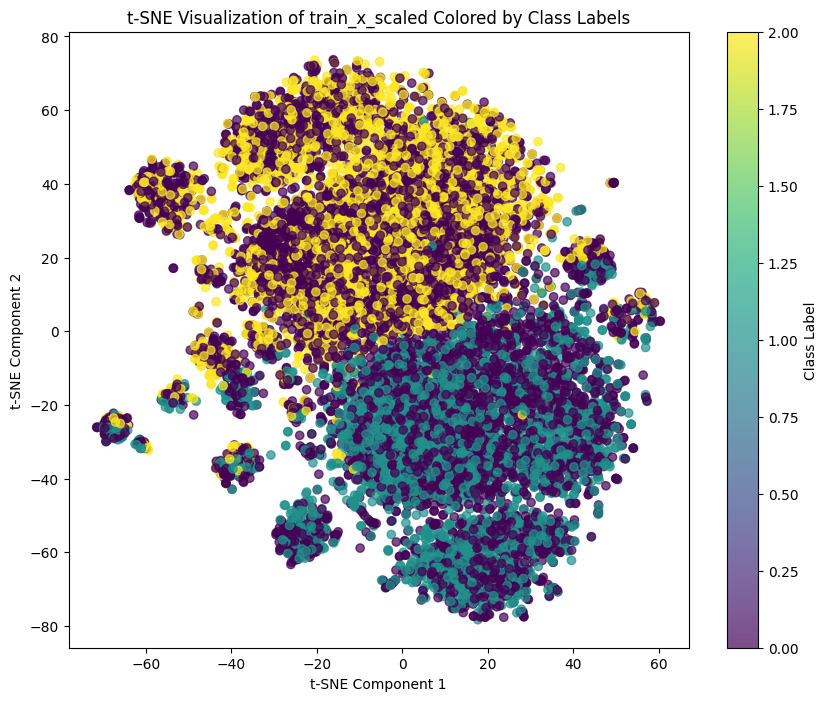

In [37]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_tsne[:, 0], train_x_tsne[:, 1], 
                      c=train_sample_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Class Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of train_x_scaled Colored by Class Labels')
plt.show()

We can see that label 1 and 2 are separable, but label 0 is mixed with label 1 and 2. The effect of this observation is felt later in the project when we try to train a model the dataset.

## Model Building

## train-validation split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The strategy here is to use the same neural network setting to run on different preprocessed datasets.

In [46]:
distClassifier = MLPClassifier(hidden_layer_sizes=(30, 15), max_iter=500, 
                               activation='relu', solver='adam', alpha=0.001,
                                batch_size='auto', learning_rate="constant",
                                learning_rate_init=0.00001, tol=1e-4,
                                random_state=42)

In [44]:
def train_and_evaluate_model(model, train_x, train_y, num_class, verbose_iter=False):
    X_train, X_eval, y_train, y_eval = train_test_split(train_x, train_y,
                                                        test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    if verbose_iter:
        print(f"Number of Iterations: {model.n_iter_}")
    y_pred = model.predict(X_eval)

    # Generate classification report for precision, recall, and F1 score
    report = classification_report(y_eval, y_pred, 
                                   target_names=[f'Class {i}' for i in range(num_class)])
    print("\nClassification Report:")
    print(report)

    # Plot the confusion matrix
    cm = confusion_matrix(y_eval, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_eval), yticklabels=np.unique(y_eval))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

Number of Iterations: 446

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.59      0.66      0.62      1295
     Class 1       0.49      0.50      0.49       505
     Class 2       0.53      0.36      0.43       549

    accuracy                           0.56      2349
   macro avg       0.53      0.51      0.52      2349
weighted avg       0.55      0.56      0.55      2349



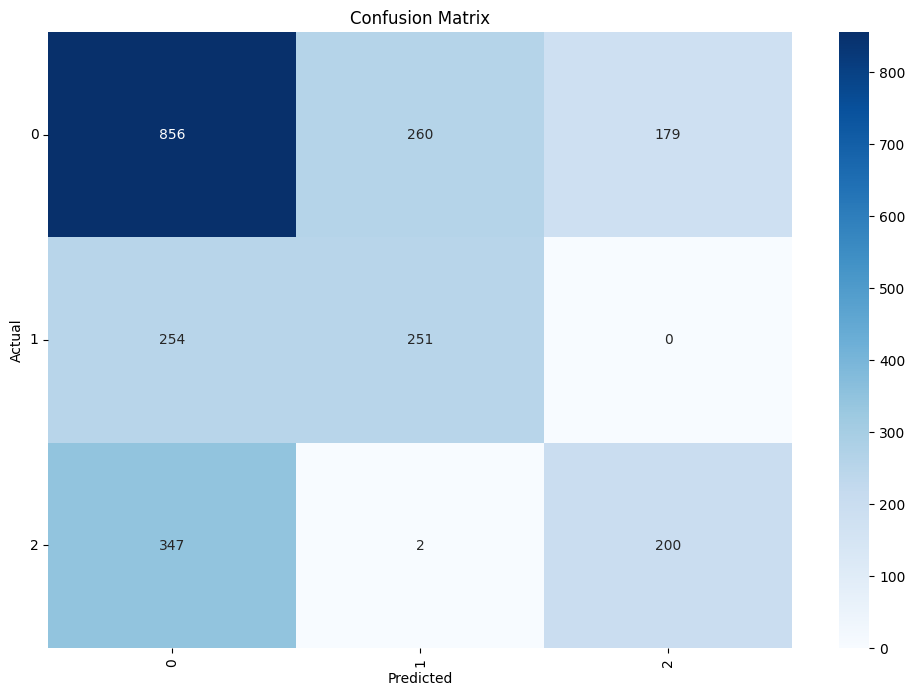

In [47]:
# 1% sample
train_and_evaluate_model(distClassifier, train_sample, train_sample_labels, 3, True)

We can see that with the 1% sample of original data, the model has a difficult time telling label 0 from the other two labels, while rarely confusing label 1 and 2. Nevertheless, the recall for label 0 is still higher than other two labels likely due to the class imbalance.

Number of Iterations: 329

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.39      0.16      0.23      1254
     Class 1       0.70      0.88      0.78      1320
     Class 2       0.65      0.86      0.74      1248

    accuracy                           0.64      3822
   macro avg       0.58      0.64      0.58      3822
weighted avg       0.58      0.64      0.59      3822



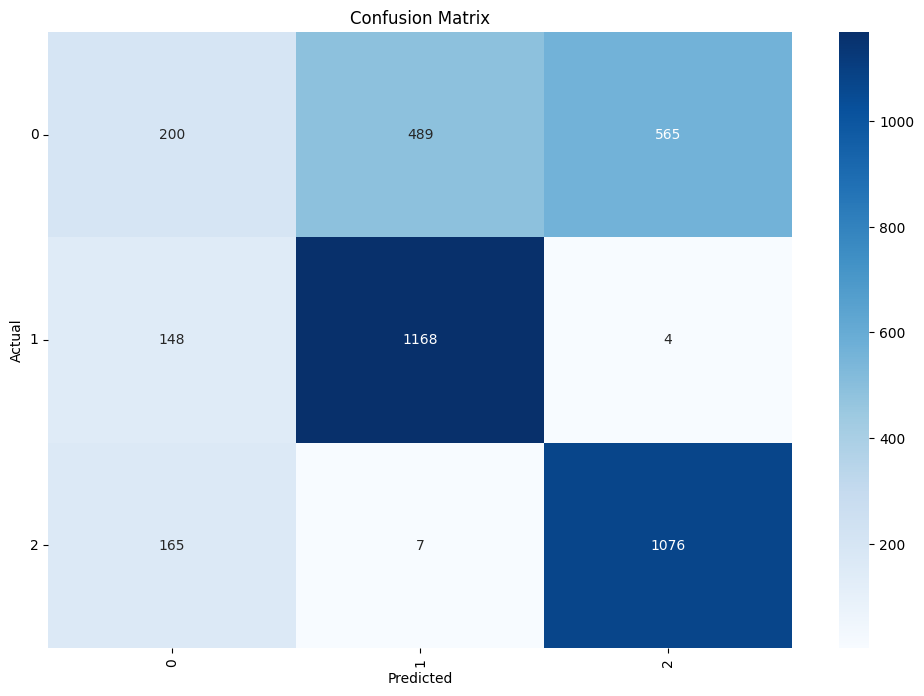

In [ ]:
# Equal sample (1% label 0, 2.5% label 1, 2.25% label 2)
train_and_evaluate_model(distClassifier, 
                         train_equal_sample_x, train_equal_sample_y, 3, True)

We can see clearly here that when the dataset is balanced, the recall for label 0 drops significantly, while the recall for label 1 and 2 increases. This is likely due to the fact that the model cannot simply shoot in the dark and guess label 0 to get a high recall. On the other hand, the model does better job at distinguishing label 1 and 2.

Number of Iterations: 250

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.56      0.52      0.54      1047
     Class 1       0.57      0.61      0.59      1103

    accuracy                           0.57      2150
   macro avg       0.56      0.56      0.56      2150
weighted avg       0.57      0.57      0.56      2150



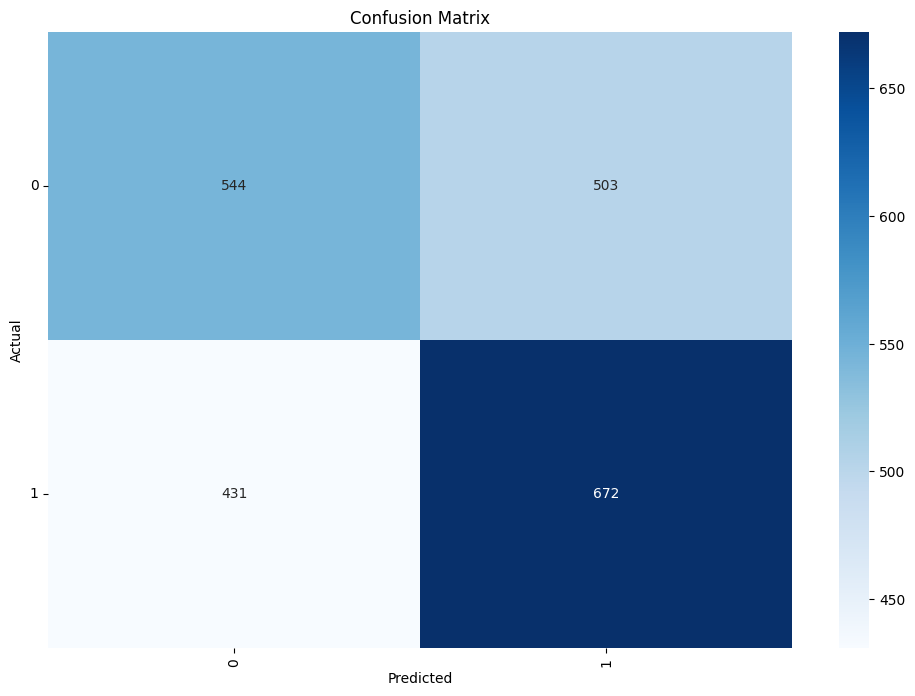

In [ ]:
# Binary labels (0 and 1) 1% sample
train_and_evaluate_model(distClassifier, 
                         train_sample_bi_balanced,
                         train_sample_bi_balanced_labels, 2, True)

In light of the previous observation, we can see that when we turn the dataset into a binary labeled dataset, the model does a better job at telling whether a sample belongs to label 0 or not. 

Building on this observation, we try to train different models on the binary labeled dataset.

First, we sample more data from the binary balanced labeled dataset.

In [38]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
# Get 1% for sample training
for large_port_index, small_port_index in split.split(train_x_bi_scaled, 
                                                      train_y_bi_balanced):
    train_sample10_bi_balanced = train_x_bi_scaled[small_port_index]
    train_sample10_bi_balanced_labels = train_y_bi_balanced[small_port_index]

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.58      0.52      0.55     10874
     Class 1       0.56      0.61      0.58     10623

    accuracy                           0.57     21497
   macro avg       0.57      0.57      0.57     21497
weighted avg       0.57      0.57      0.57     21497



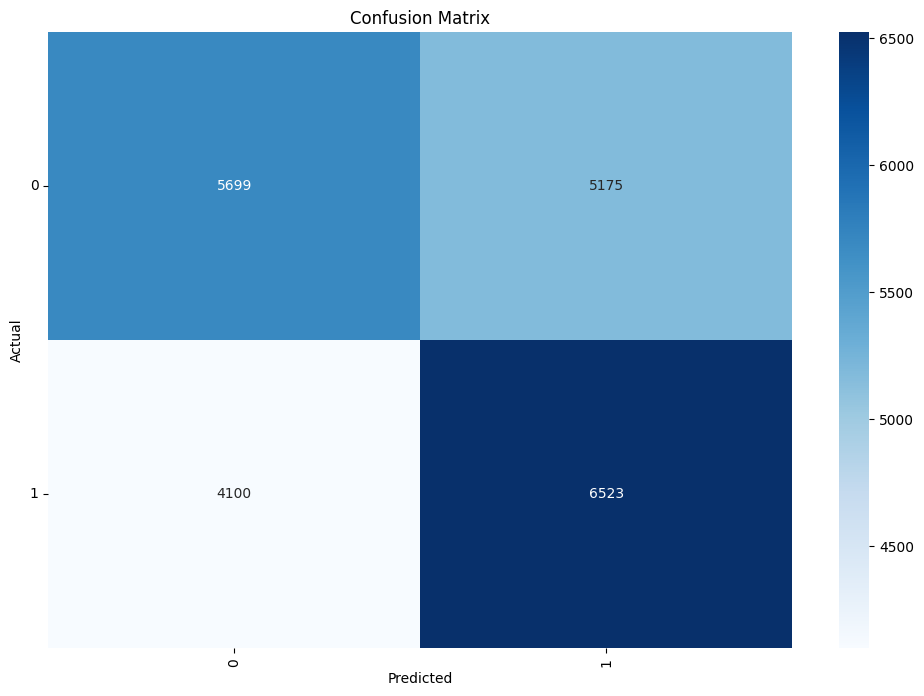

In [53]:
# Uses the 10% sample of the balanced binary labels
train_and_evaluate_model(clf, train_sample10_bi_balanced, 
                         train_sample10_bi_balanced_labels, 2)

The random forest model does more or less the same as the neural network model.

### SVM Classifier

SVM with an RBF kernel helps to separate the classes better if the decision boundary is complex.

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.55      0.57      0.56      1047
     Class 1       0.58      0.56      0.57      1103

    accuracy                           0.56      2150
   macro avg       0.56      0.56      0.56      2150
weighted avg       0.56      0.56      0.56      2150



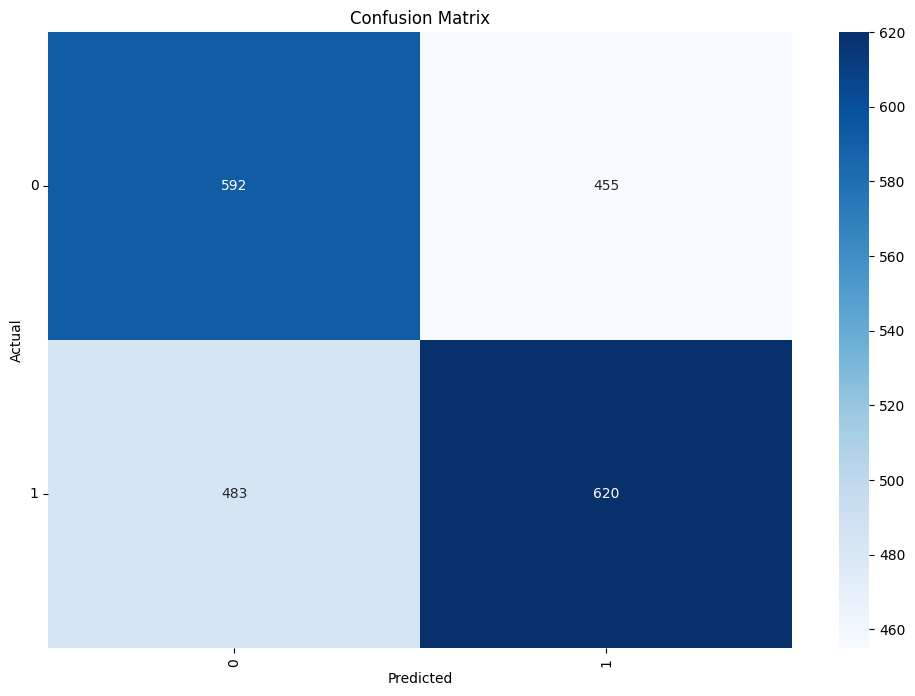

In [54]:
# Uses the 1% sample of the balanced binary labels
train_and_evaluate_model(svc, train_sample_bi_balanced, 
                         train_sample_bi_balanced_labels, 2)

### XGBoost

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(n_estimators=100, max_depth=4, random_state=42,
                    learning_rate=0.03, alpha=0.1,
                    objective='binary:logistic')


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.60      0.57      0.58     10874
     Class 1       0.58      0.60      0.59     10623

    accuracy                           0.59     21497
   macro avg       0.59      0.59      0.59     21497
weighted avg       0.59      0.59      0.59     21497



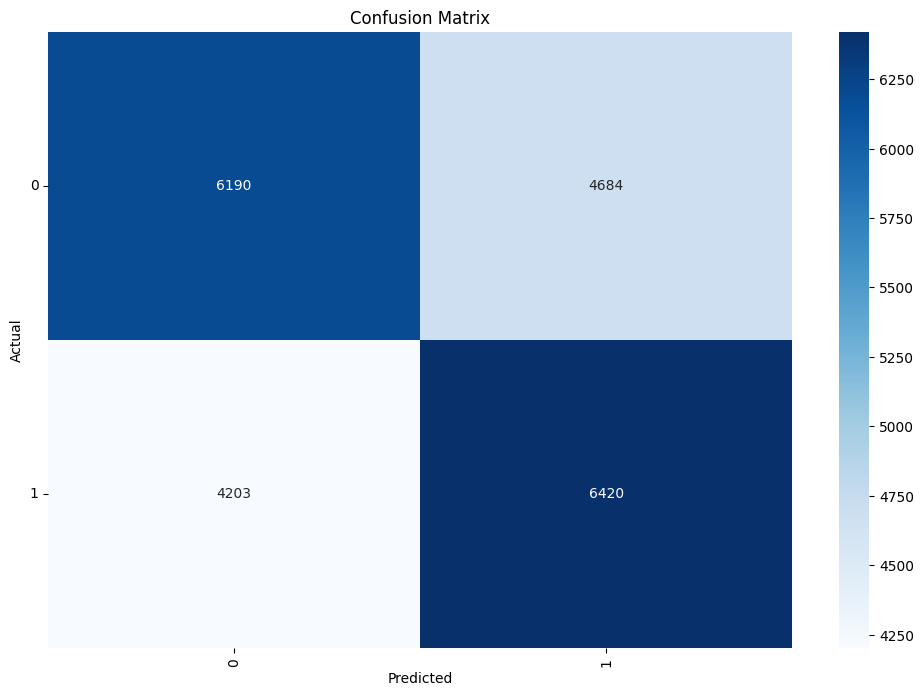

In [57]:
# Uses the 10% sample of the balanced binary labels
train_and_evaluate_model(xgb, train_sample10_bi_balanced, 
                         train_sample10_bi_balanced_labels, 2)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.59      0.56      0.58    107666
     Class 1       0.58      0.61      0.59    107301

    accuracy                           0.59    214967
   macro avg       0.59      0.59      0.59    214967
weighted avg       0.59      0.59      0.59    214967



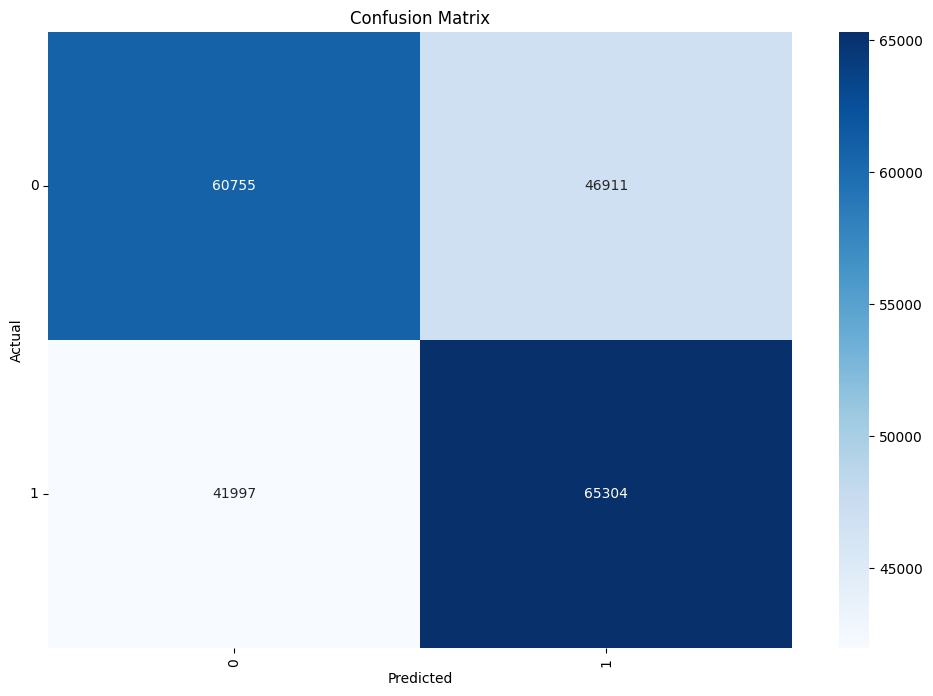

In [58]:
# Uses the entire balanced binary label dataset
train_and_evaluate_model(xgb, train_x_bi_balanced, train_y_bi_balanced, 2)

Although XGBoost, SVM, and Random Forest all have similar performance, XGBoost takes the least time to train. So we choose XGBoost as our final model.

As a sanity check, we train XGBoost on the balanced version of the original dataset.


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.57      0.03      0.05     51293
     Class 1       0.67      0.99      0.80     51533
     Class 2       0.66      0.99      0.79     51342

    accuracy                           0.67    154168
   macro avg       0.64      0.67      0.55    154168
weighted avg       0.64      0.67      0.55    154168



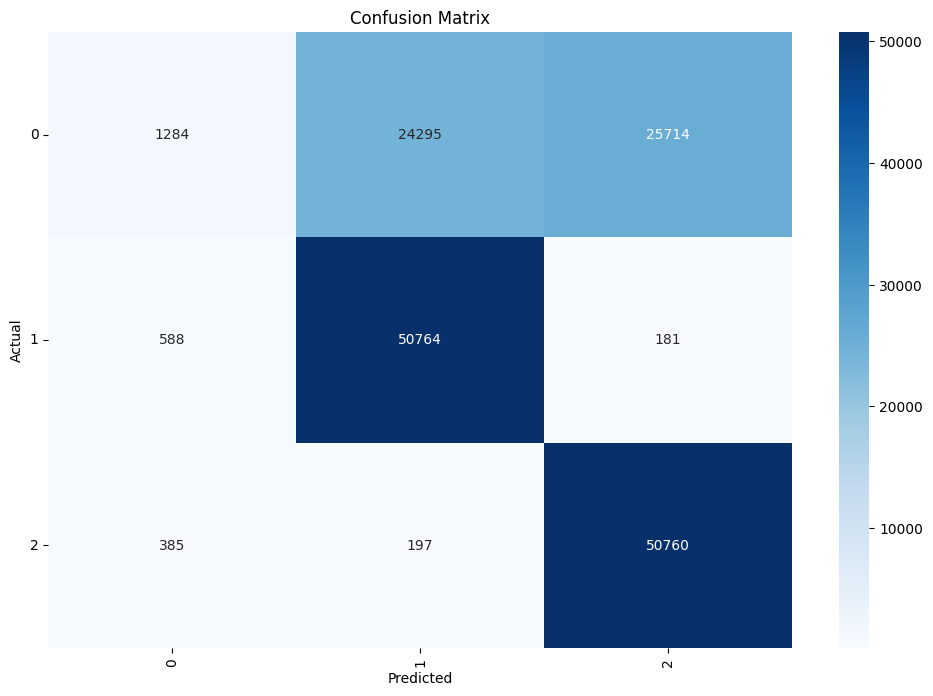

In [62]:
train_and_evaluate_model(xgb, train_x_scaled, train_y_balanced, 3)

The issue persists.

# Two Step Model: Classify Label 0 and then classify Label 1 and 2

However, from the above we see that XGBoost is capable of distinguishing between label 1 and 2. So we will build a second model to distinguish between label 1 and 2 using XGBoost and the largest possible dataset with balanced classes.

In [63]:
xgb1 = XGBClassifier(n_estimators=100, max_depth=4, random_state=42,
                    learning_rate=0.03, alpha=0.1,
                    objective='binary:logistic')
xgb2 = XGBClassifier(n_estimators=100, max_depth=4, random_state=42,
                    learning_rate=0.03, alpha=0.1,
                    objective='binary:logistic')

#### Train the first model to classify label 0

In [66]:
X_train, X_eval, y_train, y_eval = train_test_split(train_x_bi_balanced, 
                                                    train_y_bi_balanced,
                                                    test_size=0.2, 
                                                    random_state=42)
xgb1.fit(X_train, y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

Find the subset of the original dataset that is labeled as 1 or 2 to train the second model.

In [73]:
train_x_label_1_2 = train_x[(train_y == 1) | (train_y == 2)]
train_y_label_1_2 = train_y[(train_y == 1) | (train_y == 2)]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()
train_y_label_1_2_le = le.fit_transform(train_y_label_1_2)

In [75]:
X_train, X_eval, y_train, y_eval = train_test_split(train_x_label_1_2,
                                                    train_y_label_1_2_le,
                                                    test_size=0.2,
                                                    random_state=42)
xgb2.fit(X_train, y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

Check out the performance of the second model.

In [78]:
y_pred = xgb2.predict(X_eval)
y_pred = le.inverse_transform(y_pred)


Classification Report:
              precision    recall  f1-score   support

     Class 1       1.00      0.99      1.00     51195
     Class 2       1.00      1.00      1.00     56289

    accuracy                           1.00    107484
   macro avg       1.00      1.00      1.00    107484
weighted avg       1.00      1.00      1.00    107484



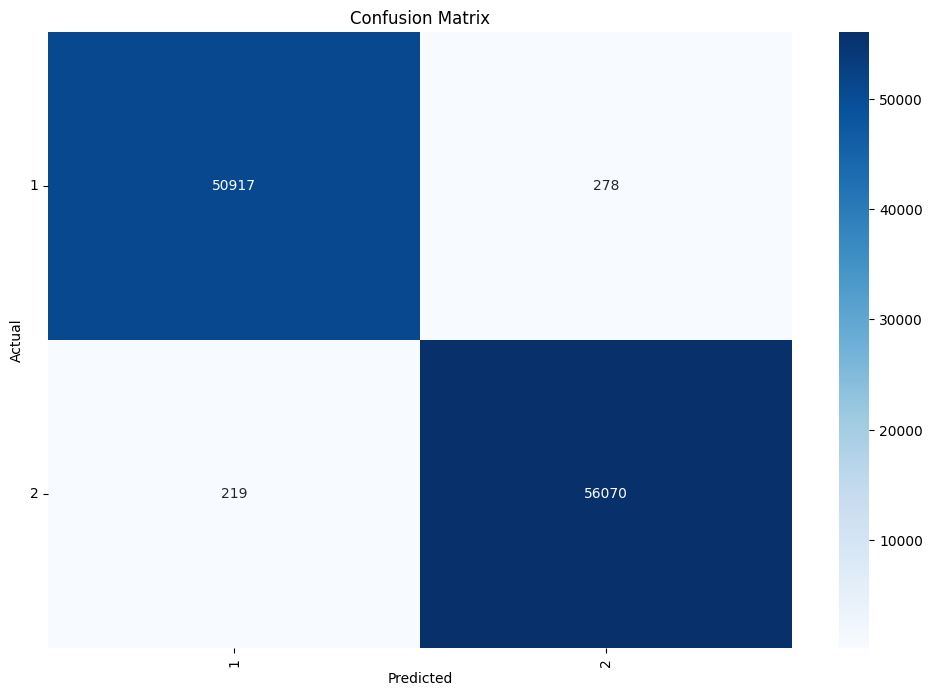

In [84]:
y_pred = xgb2.predict(X_eval)
y_pred = le.inverse_transform(y_pred)
y_eval = le.inverse_transform(y_eval)

# Generate classification report for precision, recall, and F1 score
report = classification_report(y_eval, y_pred, 
                                target_names=['Class 1', 'Class 2'])
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
cm = confusion_matrix(y_eval, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_eval), yticklabels=np.unique(y_eval))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

The second model does a good job at distinguishing between label 1 and 2.

Now, we can combine the two models to classify the original dataset.

In [114]:
# Prepare the evaluation data
input_x_scaled = scaler.transform(eval_x)
eval_y_bi = eval_y.copy()
eval_y_bi[eval_y_bi == 2] = 1


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.56      0.92      0.69    635393
     Class 1       0.58      0.14      0.22    539909

    accuracy                           0.56   1175302
   macro avg       0.57      0.53      0.46   1175302
weighted avg       0.57      0.56      0.48   1175302



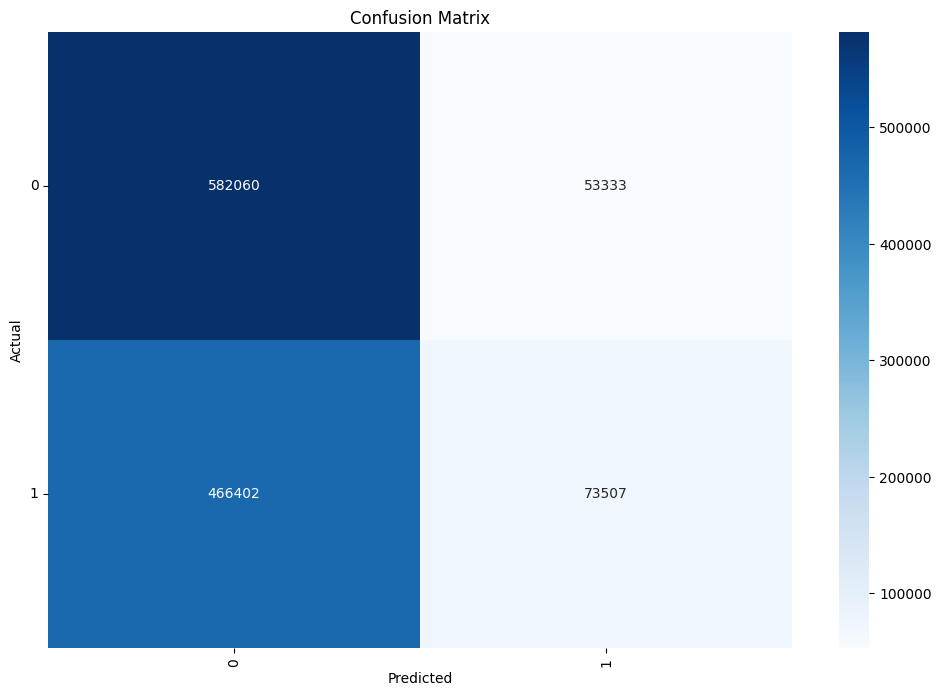

In [115]:
y_pred1 = xgb1.predict(input_x_scaled)

# Generate classification report for precision, recall, and F1 score
report = classification_report(eval_y_bi, y_pred1, 
                                target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
cm = confusion_matrix(eval_y_bi, y_pred1)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(eval_y_bi), yticklabels=np.unique(eval_y_bi))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Interestingly, when using eval_x as the input, XGB model does very poorly in telling label 0 from label 1 and 2. Thus, we try to go back to neural network to see if we can get a better performance.

In [126]:
nn = MLPClassifier(hidden_layer_sizes=(30, 15), max_iter=500, 
                activation='relu', solver='adam', alpha=0.001,
                batch_size='auto', learning_rate="constant",
                learning_rate_init=0.00001, tol=1e-4,
                random_state=42)

In [127]:
X_train, X_eval, y_train, y_eval = train_test_split(train_sample10_bi_balanced,
                                                    train_sample10_bi_balanced_labels,
                                                    test_size=0.2,
                                                    random_state=42)

In [128]:
nn.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(30, 15),
              learning_rate_init=1e-05, max_iter=500, random_state=42)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.60      0.53      0.56    635393
     Class 1       0.52      0.59      0.55    539909

    accuracy                           0.56   1175302
   macro avg       0.56      0.56      0.56   1175302
weighted avg       0.56      0.56      0.56   1175302



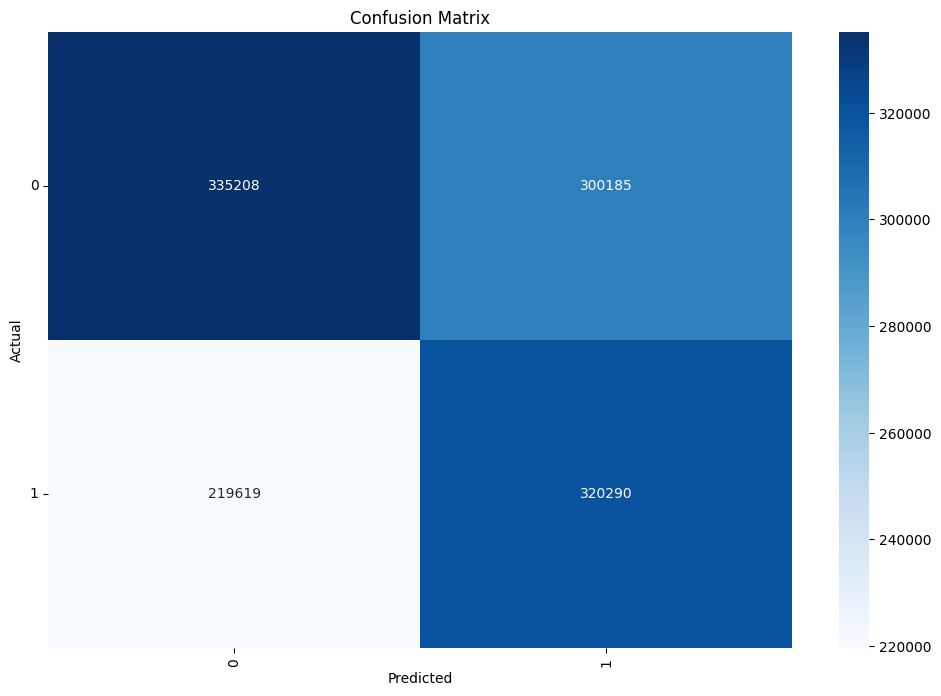

In [129]:
y_pred1 = nn.predict(input_x_scaled)

# Generate classification report for precision, recall, and F1 score
report = classification_report(eval_y_bi, y_pred1, 
                                target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
cm = confusion_matrix(eval_y_bi, y_pred1)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(eval_y_bi), yticklabels=np.unique(eval_y_bi))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

The neural network model proves to generalize well and has a similar performance on the eval data as on the train data.

In [130]:
def result_model_predict(input_x):
    input_x_scaled = scaler.transform(input_x)
    
    y_pred1 = nn.predict(input_x_scaled)
    input_pred_not_0 = input_x_scaled[y_pred1 == 1]
    y_pred2 = xgb2.predict(input_pred_not_0)
    y_pred2 = le.inverse_transform(y_pred2)

    y_pred = y_pred1.copy()
    y_pred[y_pred1 == 1] = y_pred2

    return y_pred


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.60      0.53      0.56    635393
     Class 1       0.51      0.58      0.54    249039
     Class 2       0.52      0.60      0.56    290870

    accuracy                           0.56   1175302
   macro avg       0.54      0.57      0.55   1175302
weighted avg       0.56      0.56      0.56   1175302



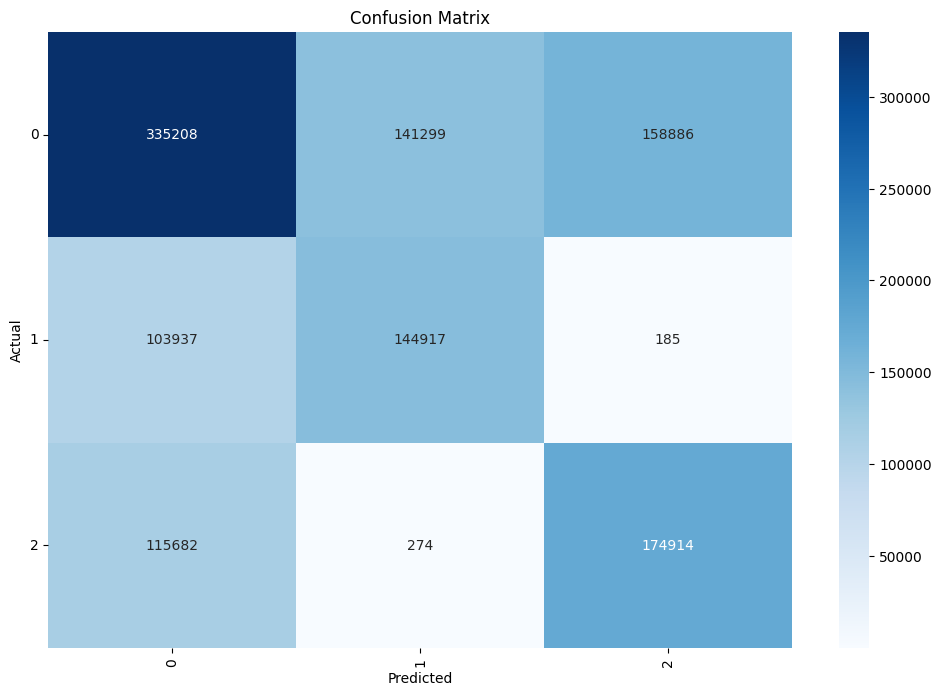

In [133]:
y_pred = result_model_predict(eval_x)

# Generate classification report for precision, recall, and F1 score
report = classification_report(eval_y, y_pred, 
                                target_names=['Class 0', 'Class 1', 'Class 2'])
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
cm = confusion_matrix(eval_y, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(eval_y), yticklabels=np.unique(eval_y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

It turns out that it performs just like the naive neural network model that is trained on the original dataset.